# Zadanie domowe

W przypadku obrazów w odcieniach szarości pojedynczy piksel z zakresu [0; 255] reprezentowany jest jako 8-bitowa liczba bez znaku.
Pewnym rozszerzeniem analizy sposobu reprezentacji obrazu może być następujący eksperyment.
Załóżmy, że z każdego z 8 bitów możemy stworzyć pojedynczy obraz binarny (ang. _bit-plane slicing_).
Dla obrazka _100zloty.jpg_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/100zloty.jpg) stwórz 8 obrazów, z których każdy powinien zawierać jedną płaszczyznę bitową.
Podpowiedź $-$ warto sprawdzić, jak realizuje się bitowe operacje logiczne.
Zastosowanie takiej dekompozycji obrazu pozwala na analizę ,,ważności'' poszczególnych bitów.
Jest to użyteczne w kwantyzacji, ale także w kompresji.

W drugim etapie zadania proszę spróbować odtworzyć obraz oryginalny z mniejszej liczby obrazów binarnych.
Warto zacząć od dwóch najbardziej znaczących bitów, a później dodawać kolejne.
Należy utworzyć co najmniej trzy wersje zrekonstruowanych obrazów.
Podpowiedź $-$ rekonstrukcja obrazu to mnożenie przez odpowiednią potęgę liczby 2 (przesunięcie bitowe) oraz dodawanie.

0
1
0
1
1
1
0
0


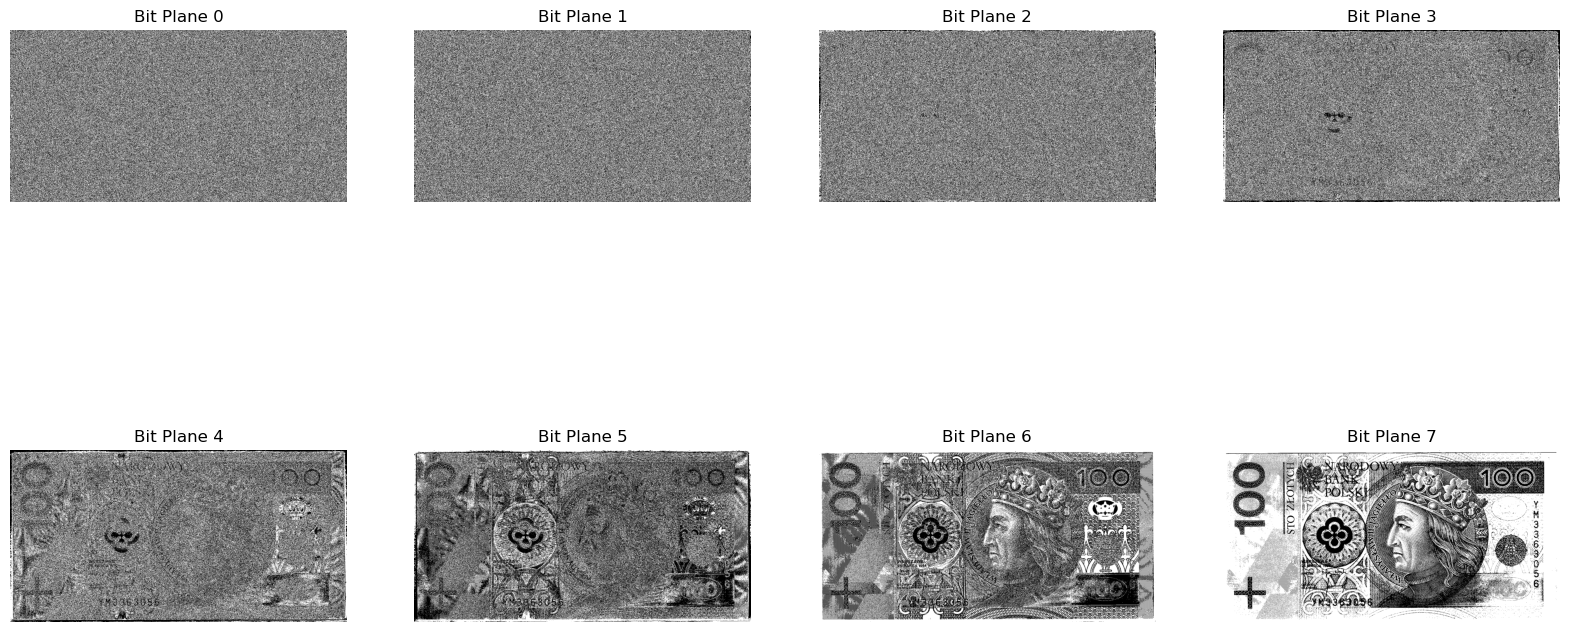

In [63]:
import cv2
import os
import requests
import matplotlib.pyplot as plt
import numpy as np

url = 'https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/'
fileName = '100zloty.jpg'
if not os.path.exists(fileName) :
    r = requests.get(url + fileName, allow_redirects=True)
    open(fileName, 'wb').write(r.content)

img = cv2.imread(fileName)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_bite_dict = dict()

for i in range(8):
    bit_plane = np.zeros_like(img)
    bit_plane[img & (1 << i) != 0] = 1  # for i = 3 -> 00001000
    print(bit_plane[17][30])
    img_bite_dict[i] = bit_plane

fig, axs = plt.subplots(2, 4, figsize=(20, 10))
axs = axs.ravel()
for i in range(8):
    axs[i].imshow(img_bite_dict[i], cmap='gray')
    axs[i].set_title('Bit Plane {}'.format(i))
    axs[i].axis('off')
plt.show()



58


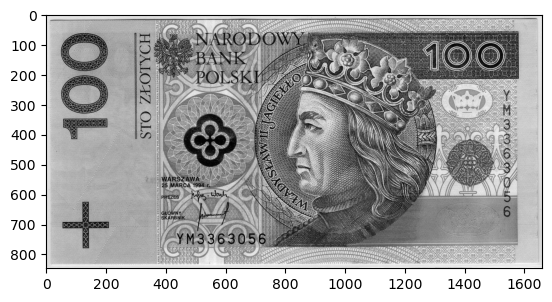

In [64]:
img = cv2.imread(fileName)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(img[17][30])

plt.imshow(img, cmap='gray')

itertation : [7, 6, 5]
2
itertation : [7, 6, 0]
0
itertation : [6, 5, 4, 3]
6
itertation : [0, 1, 2, 3, 4, 5, 6, 7]
8


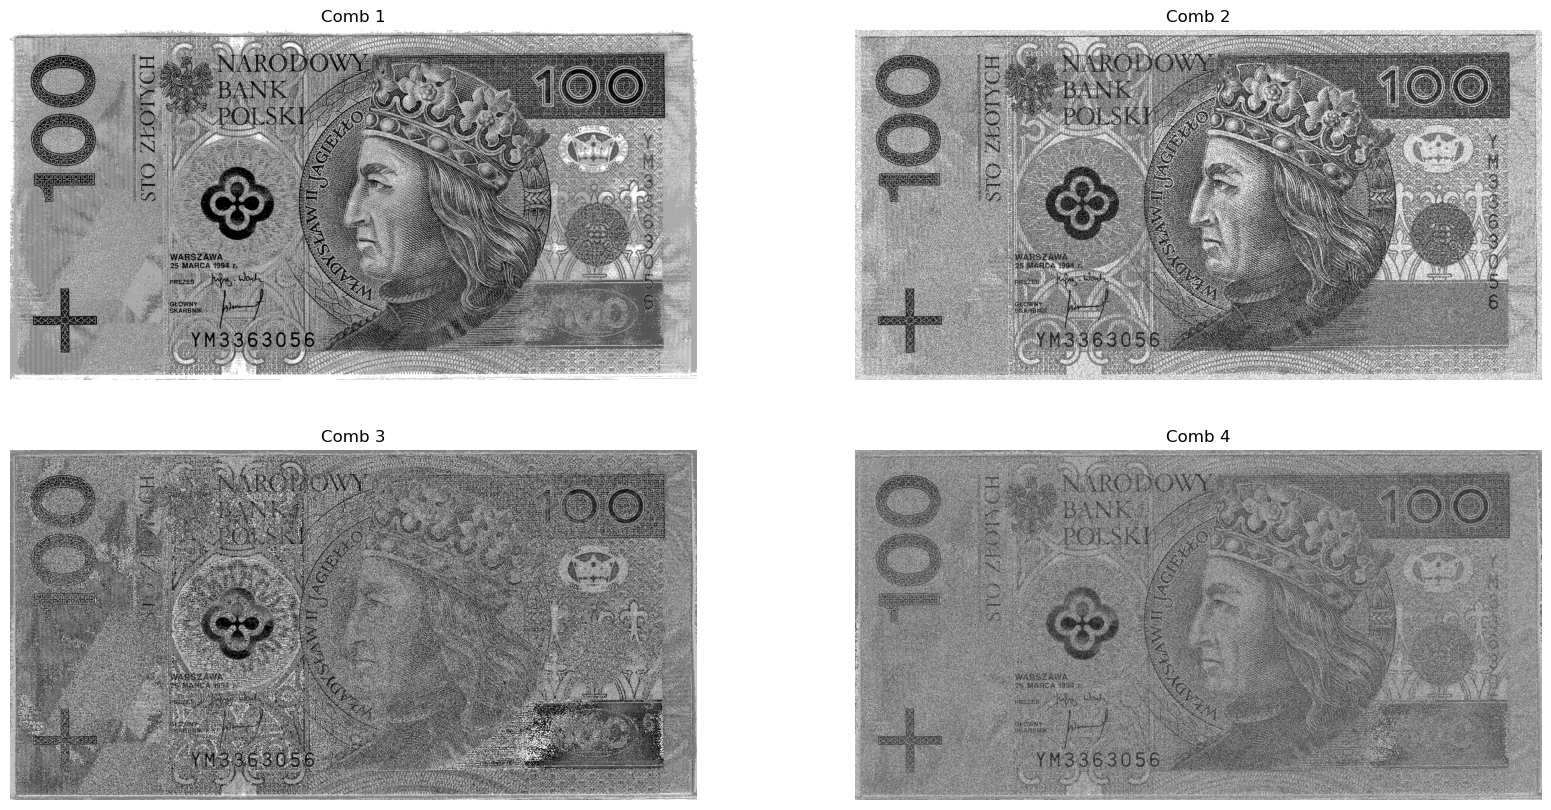

In [65]:
combs = [[7, 6, 5], [7, 6, 0], [6,5,4,3],[0, 1, 2, 3, 4, 5, 6, 7]]
imgs = []

for comb in combs:
    comb_img = np.zeros_like(img)
    print(f"itertation : {comb}")
    for i in comb:
        comb_img += img_bite_dict[i] *(2**1)
    print(comb_img[17][30])
    imgs.append(comb_img)

fig, axs = plt.subplots(2, 2, figsize=(20, 10))
axs = axs.ravel()
for i in range(4):
    axs[i].imshow(imgs[i], cmap='gray')
    axs[i].set_title('Comb {}'.format(i+1))
    axs[i].axis('off')
plt.show()
